In [57]:
#import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Read data
df = pd.read_csv('./Data/EcommerceCustomers.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [59]:
#Configure the quality of chart. 
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 13

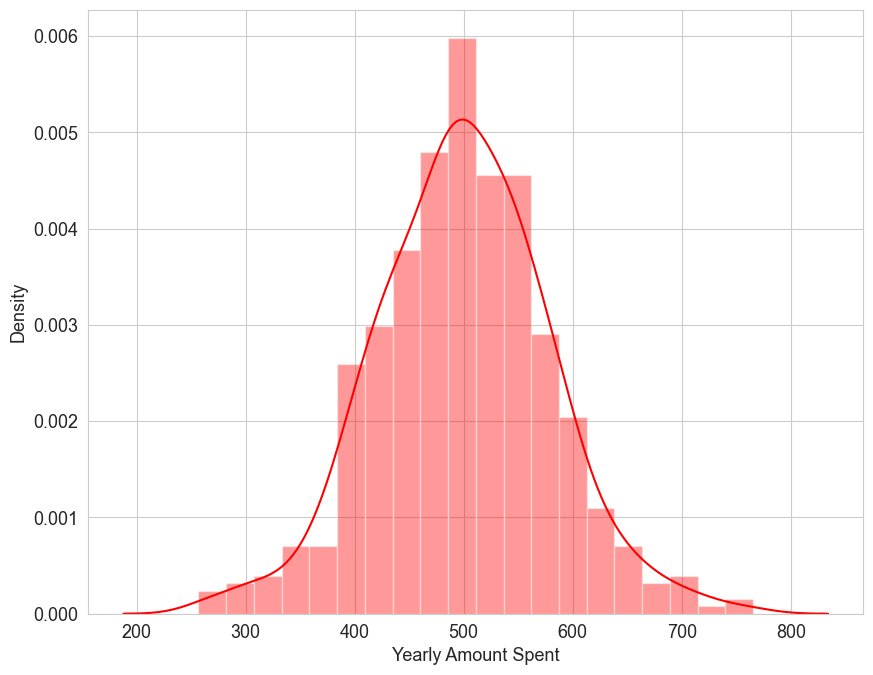

In [7]:
#display the distribution of Yearky amount spent
ax = sns.distplot(df['Yearly Amount Spent'], kde = True, color = 'r')

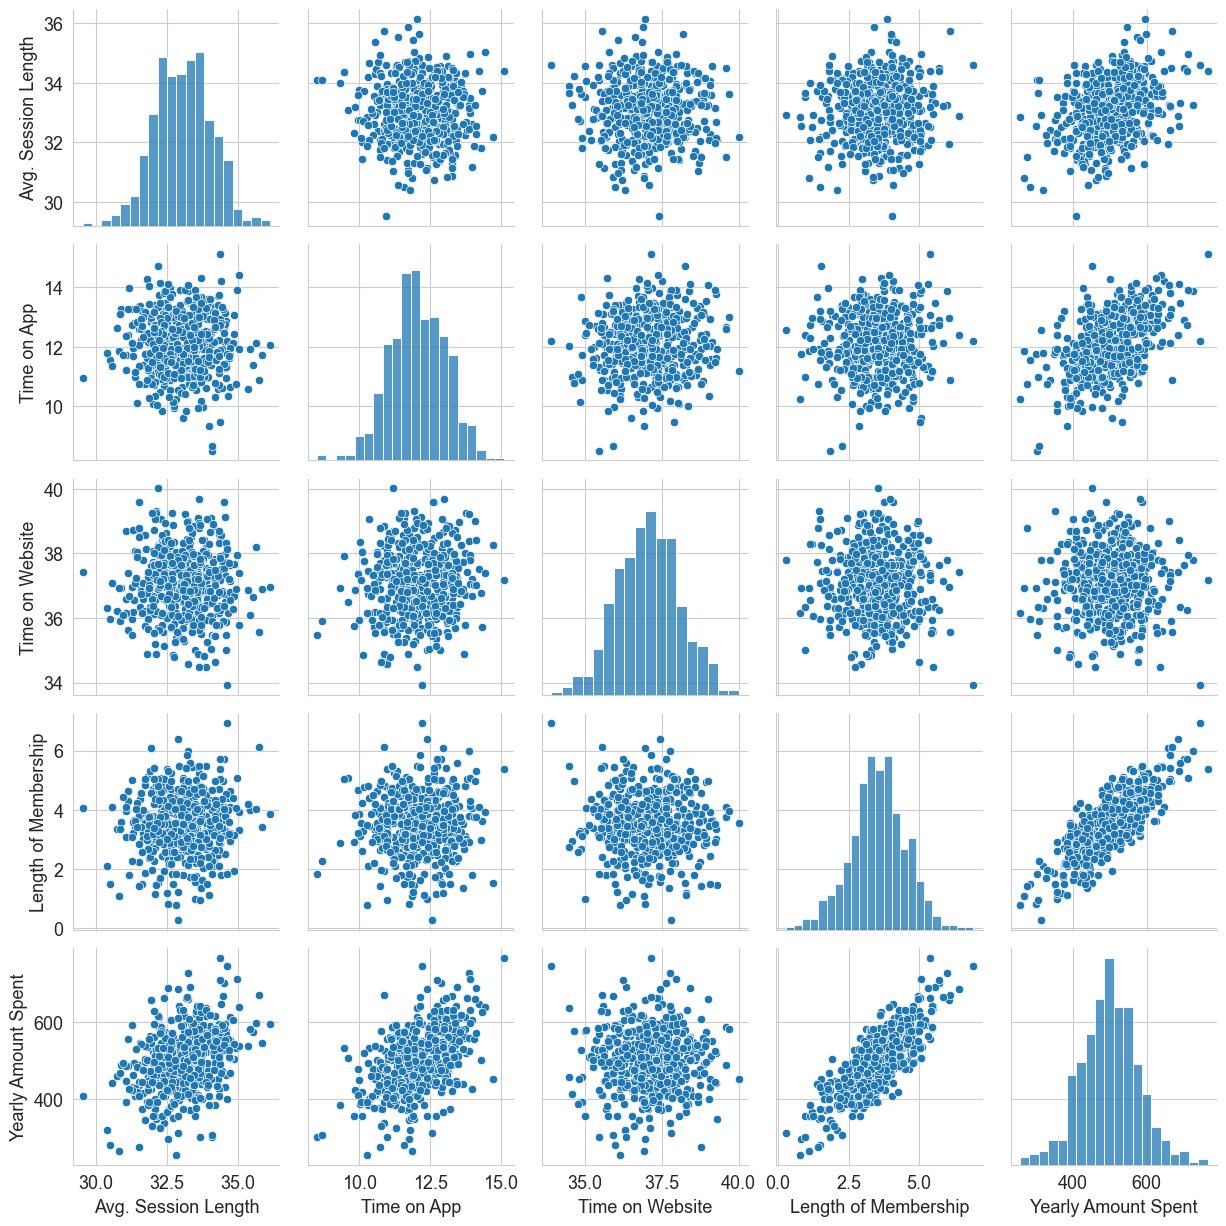

In [13]:
# biểu đồ phân tán của các biến
sns.pairplot(df)

<AxesSubplot:>

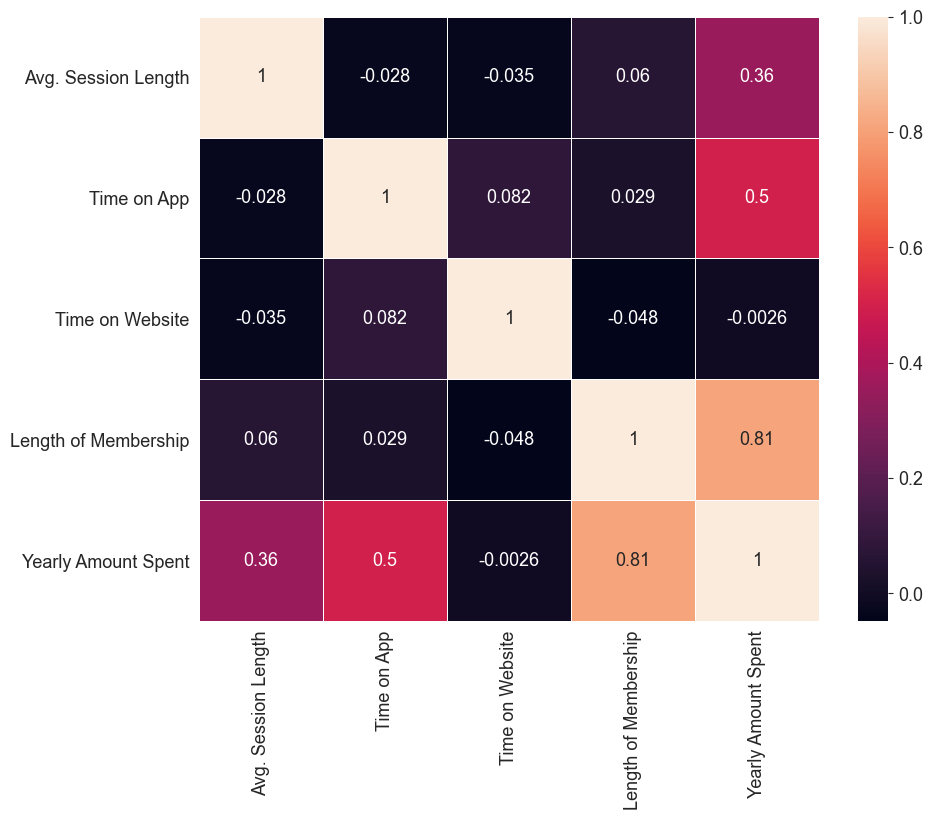

In [60]:
#xét độ tương quan giữa các biến
sns.heatmap(df.corr(), annot=True, linewidths=.5)

In [61]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [51]:
#Train model, chia file.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model = LinearRegression().fit(X_train,y_train)

Text(0, 0.5, 'Predicted Y')

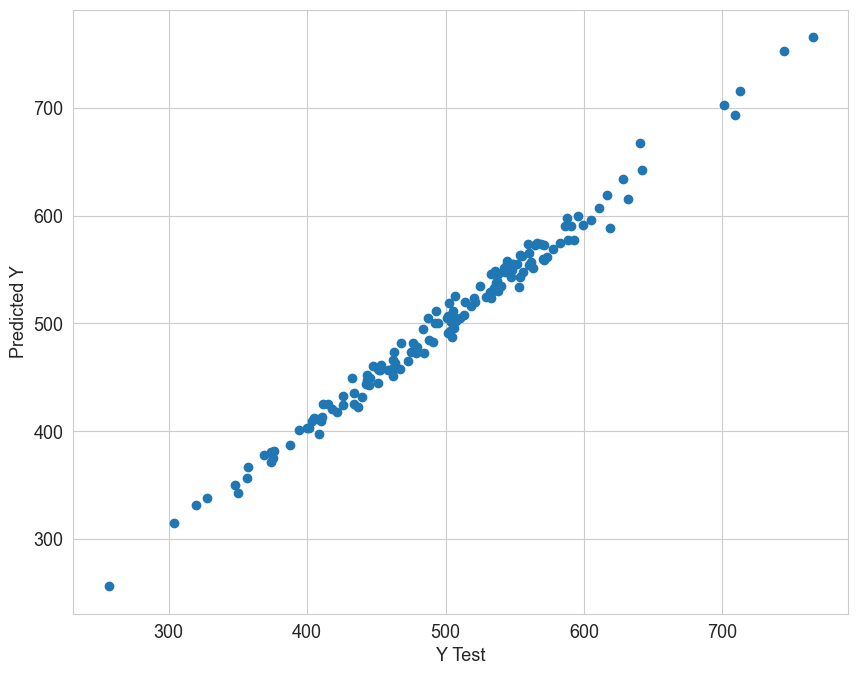

In [69]:
#Biểu đồ thể hiện biến Y và giá trị y được dự đoán
y_pre = model.predict(X_test)
plt.scatter(y_test,y_pre)
plt.xlabel('Y Test' )
plt.ylabel('Predicted Y')

In [70]:
print('RMSE_1 :'," ",mean_squared_error(y_test, y_pre))
r2_score_1 = r2_score(y_test, y_pre)
print('r2_score_1 :'," ", r2_score_1)

RMSE_1 :   79.81305165097427
r2_score_1 :   0.9890046246741234


In [71]:
#Drop times on website
X_2 = df[['Avg. Session Length','Time on App','Length of Membership']]
y_2 = df['Yearly Amount Spent']

In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3, random_state=101)
model = LinearRegression().fit(X_train2,y_train2)

Text(0, 0.5, 'Predicted Y')

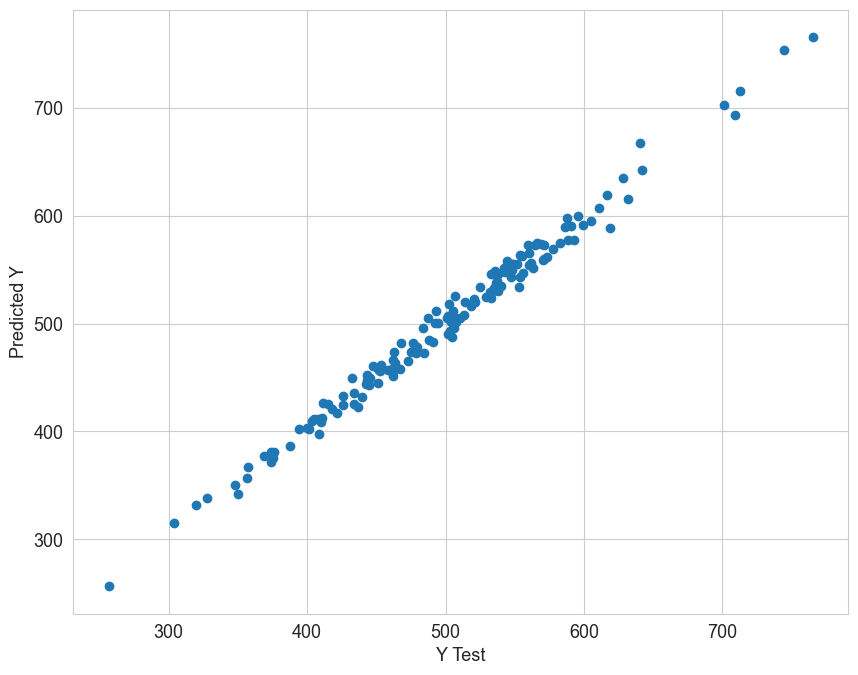

In [73]:
y_pre_2 = model.predict(X_test2)
plt.scatter(y_test,y_pre_2)
plt.xlabel('Y Test', )
plt.ylabel('Predicted Y')

In [74]:
print('RMSE2 :'," ",mean_squared_error(y_test2, y_pre_2))
r2_score_2 = r2_score(y_test, y_pre_2)
print('R2_score2 :'," ",r2_score_2)
#Kết quả thấp hơn mô hình trên khi có biến Time on Website.

RMSE2 :   80.19544609397676
R2_score2 :   0.9889519444377916


In [32]:
#Sử dụng cách tính độ quan trọng của các biến độc lập, xét mức độ quan trong để lựa chọn biến
X2 = X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
Y2 = df['Yearly Amount Spent']
names = X2.columns
rf = RandomForestRegressor() 
rf.fit(X2, Y2)

feature_importance = pd.DataFrame(
    {
        'names': names,
        'feature_importance': rf.feature_importances_
    }
)
sorted_fi = feature_importance.sort_values(by="feature_importance", ascending=False)
top_fi = sorted_fi.head(20).names.tolist()
sorted_fi.head(10)

,names,feature_importance
3,Length of Membership,0.678655
1,Time on App,0.223351
0,Avg. Session Length,0.088672
2,Time on Website,0.009322


Text(0, 0.5, 'Predicted Y')

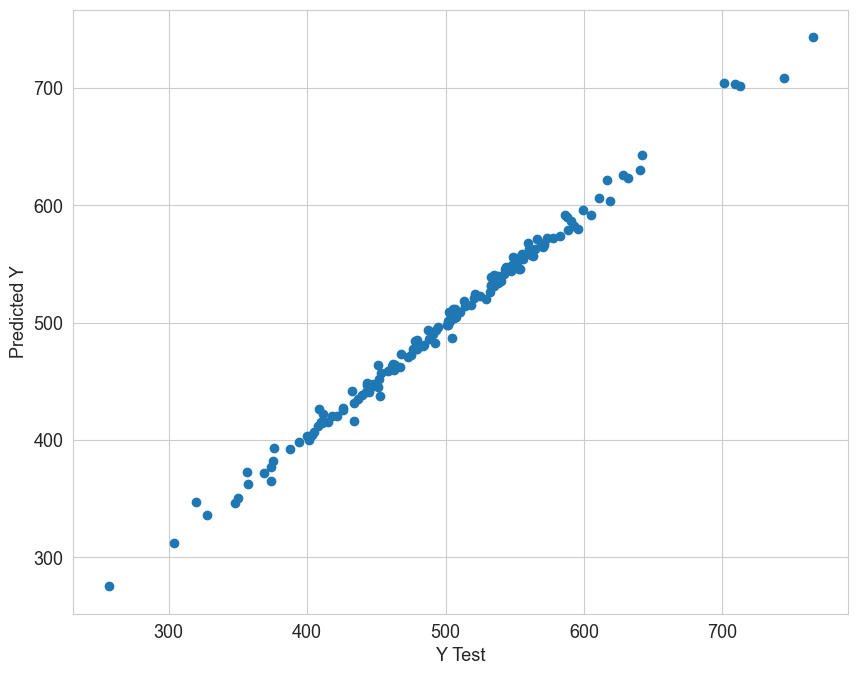

In [65]:
#Vẽ biểu đồ phân tán, áp dụng mô hình random forest regressor
RandomForestRegressor().fit(X_train,y_train)
y_pre_3 = rf.predict(X_test)
plt.scatter(y_test,y_pre_3)
plt.xlabel('Y Test', )
plt.ylabel('Predicted Y')

In [67]:
print('RMSE :'," ",mean_squared_error(y_test, y_pre_3))
R2_score_3= r2_score(y_test,y_pre_3)
print('R2_score2 :'," ",R2_score_3)
#Kết quả tốt nhất trong 3 cách trên

RMSE :   54.939369353720124
R2_score2 :   0.9924313257829963
